# Word2Vec for Sentiment Analysis in Russian
Word2vec [1] is a computationally-efficient predictive model for learning low-dimensional word embeddings from raw textual data. 
## 1. Loding sentiment data
The corpus of short texts in Russian based on Twitter messages is available at http://study.mokoron.com/ (and also described in [2]). The entire database of unlabeled tweets was used in order to train Wor2Vec model.

In [1]:
import re

def preprocess_text(text):
    text = text.lower().replace("ё", "е")
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL', text)
    text = re.sub('@[^\s]+','USER', text)
    text = re.sub('[^a-zA-Zа-яА-Я1-9]+', ' ', text)
    text = re.sub(' +',' ', text)
    return text.strip()

In Python it is easier to work with SQLite databases rather then with SQL databases, so the original SQL file was converted into SQLite using <a href="https://github.com/dumblob/mysql2sqlite">mysql2sqlite</a> script.

In [3]:
import sqlite3

conn = sqlite3.connect('mysqlite3.db')
c = conn.cursor()

with open('tweets.txt', 'w', encoding='utf-8') as f:
    for row in c.execute('SELECT ttext FROM sentiment'):
        if row[0]:
            tweet = preprocess_text(row[0])
            print(tweet, file=f)

In [279]:
tweets = open('tweets.txt').read().splitlines()

In [285]:
import pandas as pd
%matplotlib inline

preprocessed_data = pd.Series(tweets).apply(lambda x: len(x.split()))

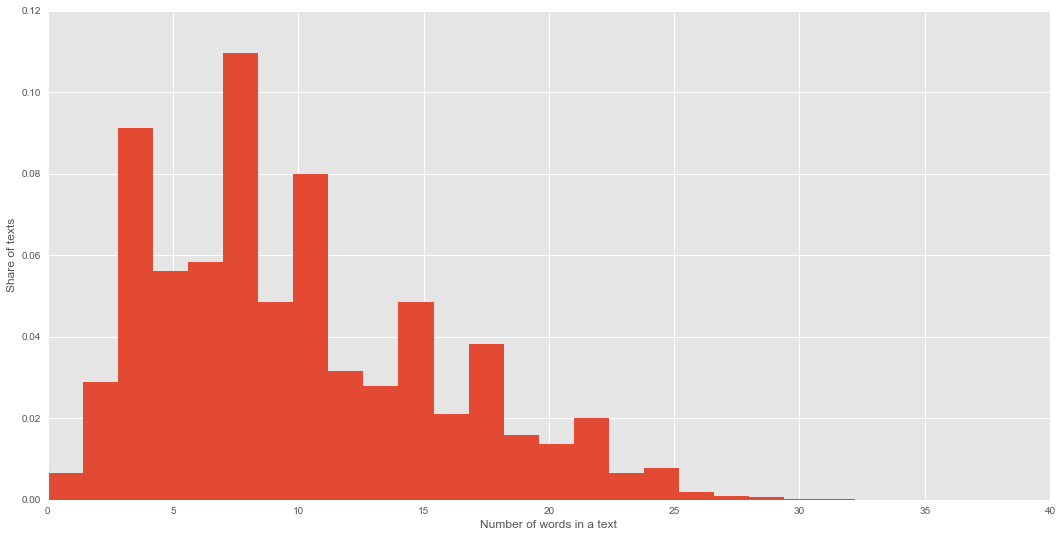

In [553]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.figure(figsize=(16, 9)) 
# facecolor='g'
n, bins, patches = plt.hist(preprocessed_data.values, 50, density=True)
plt.xlabel('Number of words in a text')
plt.ylabel('Share of texts')
plt.axis([0, 40, 0, 0.12])
plt.grid(True)
plt.show()

In [295]:
for i in range(20, 35, 1):
    preprocessed_data>i
    print("%0.5f for sentence_length=%r" % (1-(preprocessed_data>i).sum()/preprocessed_data.shape[0], i))

0.94599 for sentence_length=20
0.96172 for sentence_length=21
0.97419 for sentence_length=22
0.98353 for sentence_length=23
0.99021 for sentence_length=24
0.99457 for sentence_length=25
0.99712 for sentence_length=26
0.99849 for sentence_length=27
0.99924 for sentence_length=28
0.99959 for sentence_length=29
0.99975 for sentence_length=30
0.99984 for sentence_length=31
0.99988 for sentence_length=32
0.99990 for sentence_length=33
0.99992 for sentence_length=34


## 2. Training the model
Gensim [3] was used for obtaining vector representations of Russian words. The model was trained on the entire dataset, which was collected and pre-processed at the previous steps.

In [37]:
import logging
import multiprocessing
import gensim
from gensim.models import Word2Vec

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

data = gensim.models.word2vec.LineSentence('tweets.txt')
model = Word2Vec(data, size=200, window=5, min_count=3, workers=multiprocessing.cpu_count())

2018-06-26 12:28:04,512 : INFO : collecting all words and their counts
2018-06-26 12:28:04,549 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-06-26 12:28:04,836 : INFO : PROGRESS: at sentence #10000, processed 99826 words, keeping 27469 word types
2018-06-26 12:28:04,981 : INFO : PROGRESS: at sentence #20000, processed 197656 words, keeping 44504 word types
2018-06-26 12:28:05,077 : INFO : PROGRESS: at sentence #30000, processed 295168 words, keeping 58483 word types
2018-06-26 12:28:05,163 : INFO : PROGRESS: at sentence #40000, processed 392292 words, keeping 70694 word types
2018-06-26 12:28:05,252 : INFO : PROGRESS: at sentence #50000, processed 490293 words, keeping 81650 word types
2018-06-26 12:28:05,380 : INFO : PROGRESS: at sentence #60000, processed 587227 words, keeping 92228 word types
2018-06-26 12:28:05,461 : INFO : PROGRESS: at sentence #70000, processed 683497 words, keeping 102462 word types
2018-06-26 12:28:05,539 : INFO : PROGRESS: at 

2018-06-26 12:28:10,134 : INFO : PROGRESS: at sentence #710000, processed 6857332 words, keeping 407175 word types
2018-06-26 12:28:10,206 : INFO : PROGRESS: at sentence #720000, processed 6954827 words, keeping 410472 word types
2018-06-26 12:28:10,280 : INFO : PROGRESS: at sentence #730000, processed 7053941 words, keeping 413777 word types
2018-06-26 12:28:10,354 : INFO : PROGRESS: at sentence #740000, processed 7156397 words, keeping 417241 word types
2018-06-26 12:28:10,431 : INFO : PROGRESS: at sentence #750000, processed 7257583 words, keeping 420330 word types
2018-06-26 12:28:10,505 : INFO : PROGRESS: at sentence #760000, processed 7359106 words, keeping 423354 word types
2018-06-26 12:28:10,583 : INFO : PROGRESS: at sentence #770000, processed 7460355 words, keeping 426267 word types
2018-06-26 12:28:10,646 : INFO : PROGRESS: at sentence #780000, processed 7560746 words, keeping 429391 word types
2018-06-26 12:28:10,709 : INFO : PROGRESS: at sentence #790000, processed 765686

2018-06-26 12:28:15,413 : INFO : PROGRESS: at sentence #1420000, processed 13804000 words, keeping 628780 word types
2018-06-26 12:28:15,498 : INFO : PROGRESS: at sentence #1430000, processed 13904284 words, keeping 631666 word types
2018-06-26 12:28:15,577 : INFO : PROGRESS: at sentence #1440000, processed 14006594 words, keeping 634761 word types
2018-06-26 12:28:15,653 : INFO : PROGRESS: at sentence #1450000, processed 14107628 words, keeping 637731 word types
2018-06-26 12:28:15,717 : INFO : PROGRESS: at sentence #1460000, processed 14206725 words, keeping 640562 word types
2018-06-26 12:28:15,793 : INFO : PROGRESS: at sentence #1470000, processed 14306126 words, keeping 643412 word types
2018-06-26 12:28:15,867 : INFO : PROGRESS: at sentence #1480000, processed 14406118 words, keeping 646181 word types
2018-06-26 12:28:15,942 : INFO : PROGRESS: at sentence #1490000, processed 14507039 words, keeping 649156 word types
2018-06-26 12:28:16,015 : INFO : PROGRESS: at sentence #1500000,

2018-06-26 12:28:20,608 : INFO : PROGRESS: at sentence #2130000, processed 20843915 words, keeping 808976 word types
2018-06-26 12:28:20,677 : INFO : PROGRESS: at sentence #2140000, processed 20945996 words, keeping 811111 word types
2018-06-26 12:28:20,746 : INFO : PROGRESS: at sentence #2150000, processed 21046003 words, keeping 813143 word types
2018-06-26 12:28:20,813 : INFO : PROGRESS: at sentence #2160000, processed 21145027 words, keeping 815347 word types
2018-06-26 12:28:20,886 : INFO : PROGRESS: at sentence #2170000, processed 21244170 words, keeping 817422 word types
2018-06-26 12:28:20,951 : INFO : PROGRESS: at sentence #2180000, processed 21343767 words, keeping 819652 word types
2018-06-26 12:28:21,028 : INFO : PROGRESS: at sentence #2190000, processed 21443661 words, keeping 821953 word types
2018-06-26 12:28:21,099 : INFO : PROGRESS: at sentence #2200000, processed 21543828 words, keeping 824199 word types
2018-06-26 12:28:21,169 : INFO : PROGRESS: at sentence #2210000,

2018-06-26 12:28:26,332 : INFO : PROGRESS: at sentence #2840000, processed 27937550 words, keeping 967426 word types
2018-06-26 12:28:26,416 : INFO : PROGRESS: at sentence #2850000, processed 28036886 words, keeping 969291 word types
2018-06-26 12:28:26,492 : INFO : PROGRESS: at sentence #2860000, processed 28136687 words, keeping 971296 word types
2018-06-26 12:28:26,571 : INFO : PROGRESS: at sentence #2870000, processed 28239961 words, keeping 973271 word types
2018-06-26 12:28:26,649 : INFO : PROGRESS: at sentence #2880000, processed 28338229 words, keeping 975233 word types
2018-06-26 12:28:26,720 : INFO : PROGRESS: at sentence #2890000, processed 28433749 words, keeping 977252 word types
2018-06-26 12:28:26,785 : INFO : PROGRESS: at sentence #2900000, processed 28531263 words, keeping 979340 word types
2018-06-26 12:28:26,858 : INFO : PROGRESS: at sentence #2910000, processed 28630193 words, keeping 981329 word types
2018-06-26 12:28:26,942 : INFO : PROGRESS: at sentence #2920000,

2018-06-26 12:28:32,009 : INFO : PROGRESS: at sentence #3540000, processed 34836608 words, keeping 1100709 word types
2018-06-26 12:28:32,090 : INFO : PROGRESS: at sentence #3550000, processed 34930959 words, keeping 1102482 word types
2018-06-26 12:28:32,177 : INFO : PROGRESS: at sentence #3560000, processed 35022863 words, keeping 1103978 word types
2018-06-26 12:28:32,259 : INFO : PROGRESS: at sentence #3570000, processed 35115821 words, keeping 1105393 word types
2018-06-26 12:28:32,332 : INFO : PROGRESS: at sentence #3580000, processed 35209699 words, keeping 1106870 word types
2018-06-26 12:28:32,416 : INFO : PROGRESS: at sentence #3590000, processed 35305935 words, keeping 1108340 word types
2018-06-26 12:28:32,502 : INFO : PROGRESS: at sentence #3600000, processed 35407644 words, keeping 1110247 word types
2018-06-26 12:28:32,582 : INFO : PROGRESS: at sentence #3610000, processed 35509199 words, keeping 1112050 word types
2018-06-26 12:28:32,653 : INFO : PROGRESS: at sentence #

2018-06-26 12:28:37,427 : INFO : PROGRESS: at sentence #4240000, processed 41868044 words, keeping 1221620 word types
2018-06-26 12:28:37,504 : INFO : PROGRESS: at sentence #4250000, processed 41968632 words, keeping 1223325 word types
2018-06-26 12:28:37,574 : INFO : PROGRESS: at sentence #4260000, processed 42069465 words, keeping 1225032 word types
2018-06-26 12:28:37,639 : INFO : PROGRESS: at sentence #4270000, processed 42170550 words, keeping 1226892 word types
2018-06-26 12:28:37,717 : INFO : PROGRESS: at sentence #4280000, processed 42275251 words, keeping 1228677 word types
2018-06-26 12:28:37,793 : INFO : PROGRESS: at sentence #4290000, processed 42380513 words, keeping 1230405 word types
2018-06-26 12:28:37,864 : INFO : PROGRESS: at sentence #4300000, processed 42485561 words, keeping 1232238 word types
2018-06-26 12:28:37,941 : INFO : PROGRESS: at sentence #4310000, processed 42589682 words, keeping 1234068 word types
2018-06-26 12:28:38,015 : INFO : PROGRESS: at sentence #

2018-06-26 12:28:42,876 : INFO : PROGRESS: at sentence #4940000, processed 49054020 words, keeping 1338899 word types
2018-06-26 12:28:42,950 : INFO : PROGRESS: at sentence #4950000, processed 49152117 words, keeping 1340441 word types
2018-06-26 12:28:43,046 : INFO : PROGRESS: at sentence #4960000, processed 49250938 words, keeping 1342008 word types
2018-06-26 12:28:43,143 : INFO : PROGRESS: at sentence #4970000, processed 49351191 words, keeping 1343562 word types
2018-06-26 12:28:43,229 : INFO : PROGRESS: at sentence #4980000, processed 49451614 words, keeping 1345136 word types
2018-06-26 12:28:43,314 : INFO : PROGRESS: at sentence #4990000, processed 49551823 words, keeping 1346722 word types
2018-06-26 12:28:43,392 : INFO : PROGRESS: at sentence #5000000, processed 49652555 words, keeping 1348300 word types
2018-06-26 12:28:43,471 : INFO : PROGRESS: at sentence #5010000, processed 49753461 words, keeping 1349928 word types
2018-06-26 12:28:43,550 : INFO : PROGRESS: at sentence #

2018-06-26 12:28:48,736 : INFO : PROGRESS: at sentence #5640000, processed 56149007 words, keeping 1442585 word types
2018-06-26 12:28:48,807 : INFO : PROGRESS: at sentence #5650000, processed 56247081 words, keeping 1444095 word types
2018-06-26 12:28:48,885 : INFO : PROGRESS: at sentence #5660000, processed 56344071 words, keeping 1445577 word types
2018-06-26 12:28:48,967 : INFO : PROGRESS: at sentence #5670000, processed 56440980 words, keeping 1447017 word types
2018-06-26 12:28:49,045 : INFO : PROGRESS: at sentence #5680000, processed 56538578 words, keeping 1448414 word types
2018-06-26 12:28:49,124 : INFO : PROGRESS: at sentence #5690000, processed 56634120 words, keeping 1449934 word types
2018-06-26 12:28:49,206 : INFO : PROGRESS: at sentence #5700000, processed 56730888 words, keeping 1451381 word types
2018-06-26 12:28:49,296 : INFO : PROGRESS: at sentence #5710000, processed 56830471 words, keeping 1452875 word types
2018-06-26 12:28:49,370 : INFO : PROGRESS: at sentence #

2018-06-26 12:28:53,885 : INFO : PROGRESS: at sentence #6340000, processed 62957366 words, keeping 1544539 word types
2018-06-26 12:28:53,954 : INFO : PROGRESS: at sentence #6350000, processed 63056952 words, keeping 1545835 word types
2018-06-26 12:28:54,025 : INFO : PROGRESS: at sentence #6360000, processed 63156066 words, keeping 1547035 word types
2018-06-26 12:28:54,097 : INFO : PROGRESS: at sentence #6370000, processed 63254820 words, keeping 1548331 word types
2018-06-26 12:28:54,167 : INFO : PROGRESS: at sentence #6380000, processed 63355882 words, keeping 1549579 word types
2018-06-26 12:28:54,247 : INFO : PROGRESS: at sentence #6390000, processed 63455765 words, keeping 1550821 word types
2018-06-26 12:28:54,333 : INFO : PROGRESS: at sentence #6400000, processed 63556279 words, keeping 1552174 word types
2018-06-26 12:28:54,410 : INFO : PROGRESS: at sentence #6410000, processed 63657263 words, keeping 1553590 word types
2018-06-26 12:28:54,491 : INFO : PROGRESS: at sentence #

2018-06-26 12:28:58,900 : INFO : PROGRESS: at sentence #7040000, processed 69908105 words, keeping 1636189 word types
2018-06-26 12:28:58,969 : INFO : PROGRESS: at sentence #7050000, processed 70004669 words, keeping 1637534 word types
2018-06-26 12:28:59,040 : INFO : PROGRESS: at sentence #7060000, processed 70100804 words, keeping 1638910 word types
2018-06-26 12:28:59,104 : INFO : PROGRESS: at sentence #7070000, processed 70196630 words, keeping 1640219 word types
2018-06-26 12:28:59,171 : INFO : PROGRESS: at sentence #7080000, processed 70293459 words, keeping 1641488 word types
2018-06-26 12:28:59,238 : INFO : PROGRESS: at sentence #7090000, processed 70388435 words, keeping 1642699 word types
2018-06-26 12:28:59,320 : INFO : PROGRESS: at sentence #7100000, processed 70484702 words, keeping 1644010 word types
2018-06-26 12:28:59,388 : INFO : PROGRESS: at sentence #7110000, processed 70583922 words, keeping 1645340 word types
2018-06-26 12:28:59,458 : INFO : PROGRESS: at sentence #

2018-06-26 12:29:03,898 : INFO : PROGRESS: at sentence #7740000, processed 76878496 words, keeping 1722774 word types
2018-06-26 12:29:03,970 : INFO : PROGRESS: at sentence #7750000, processed 76980306 words, keeping 1723921 word types
2018-06-26 12:29:04,039 : INFO : PROGRESS: at sentence #7760000, processed 77080977 words, keeping 1725010 word types
2018-06-26 12:29:04,106 : INFO : PROGRESS: at sentence #7770000, processed 77181089 words, keeping 1726158 word types
2018-06-26 12:29:04,180 : INFO : PROGRESS: at sentence #7780000, processed 77283359 words, keeping 1727203 word types
2018-06-26 12:29:04,264 : INFO : PROGRESS: at sentence #7790000, processed 77386174 words, keeping 1728302 word types
2018-06-26 12:29:04,336 : INFO : PROGRESS: at sentence #7800000, processed 77487806 words, keeping 1729560 word types
2018-06-26 12:29:04,411 : INFO : PROGRESS: at sentence #7810000, processed 77588632 words, keeping 1730848 word types
2018-06-26 12:29:04,482 : INFO : PROGRESS: at sentence #

2018-06-26 12:29:08,888 : INFO : PROGRESS: at sentence #8440000, processed 83901662 words, keeping 1809087 word types
2018-06-26 12:29:08,956 : INFO : PROGRESS: at sentence #8450000, processed 83999551 words, keeping 1810274 word types
2018-06-26 12:29:09,025 : INFO : PROGRESS: at sentence #8460000, processed 84097489 words, keeping 1811420 word types
2018-06-26 12:29:09,090 : INFO : PROGRESS: at sentence #8470000, processed 84195826 words, keeping 1812668 word types
2018-06-26 12:29:09,158 : INFO : PROGRESS: at sentence #8480000, processed 84292368 words, keeping 1813898 word types
2018-06-26 12:29:09,227 : INFO : PROGRESS: at sentence #8490000, processed 84389905 words, keeping 1815133 word types
2018-06-26 12:29:09,297 : INFO : PROGRESS: at sentence #8500000, processed 84486554 words, keeping 1816393 word types
2018-06-26 12:29:09,368 : INFO : PROGRESS: at sentence #8510000, processed 84583299 words, keeping 1817583 word types
2018-06-26 12:29:09,435 : INFO : PROGRESS: at sentence #

2018-06-26 12:29:13,560 : INFO : PROGRESS: at sentence #9140000, processed 90556662 words, keeping 1893362 word types
2018-06-26 12:29:13,621 : INFO : PROGRESS: at sentence #9150000, processed 90648733 words, keeping 1894526 word types
2018-06-26 12:29:13,695 : INFO : PROGRESS: at sentence #9160000, processed 90741074 words, keeping 1895713 word types
2018-06-26 12:29:13,761 : INFO : PROGRESS: at sentence #9170000, processed 90839277 words, keeping 1896803 word types
2018-06-26 12:29:13,825 : INFO : PROGRESS: at sentence #9180000, processed 90935879 words, keeping 1897885 word types
2018-06-26 12:29:13,887 : INFO : PROGRESS: at sentence #9190000, processed 91034431 words, keeping 1898993 word types
2018-06-26 12:29:13,951 : INFO : PROGRESS: at sentence #9200000, processed 91134504 words, keeping 1900129 word types
2018-06-26 12:29:14,020 : INFO : PROGRESS: at sentence #9210000, processed 91233133 words, keeping 1901199 word types
2018-06-26 12:29:14,085 : INFO : PROGRESS: at sentence #

2018-06-26 12:29:18,700 : INFO : PROGRESS: at sentence #9840000, processed 97428567 words, keeping 1978093 word types
2018-06-26 12:29:18,767 : INFO : PROGRESS: at sentence #9850000, processed 97526741 words, keeping 1979400 word types
2018-06-26 12:29:18,834 : INFO : PROGRESS: at sentence #9860000, processed 97623939 words, keeping 1980608 word types
2018-06-26 12:29:18,907 : INFO : PROGRESS: at sentence #9870000, processed 97724828 words, keeping 1982011 word types
2018-06-26 12:29:18,982 : INFO : PROGRESS: at sentence #9880000, processed 97823962 words, keeping 1983315 word types
2018-06-26 12:29:19,048 : INFO : PROGRESS: at sentence #9890000, processed 97920121 words, keeping 1984643 word types
2018-06-26 12:29:19,118 : INFO : PROGRESS: at sentence #9900000, processed 98017258 words, keeping 1985945 word types
2018-06-26 12:29:19,195 : INFO : PROGRESS: at sentence #9910000, processed 98116390 words, keeping 1987439 word types
2018-06-26 12:29:19,272 : INFO : PROGRESS: at sentence #

2018-06-26 12:29:23,463 : INFO : PROGRESS: at sentence #10530000, processed 104164202 words, keeping 2056460 word types
2018-06-26 12:29:23,526 : INFO : PROGRESS: at sentence #10540000, processed 104260709 words, keeping 2057497 word types
2018-06-26 12:29:23,589 : INFO : PROGRESS: at sentence #10550000, processed 104358673 words, keeping 2058515 word types
2018-06-26 12:29:23,654 : INFO : PROGRESS: at sentence #10560000, processed 104454690 words, keeping 2059553 word types
2018-06-26 12:29:23,718 : INFO : PROGRESS: at sentence #10570000, processed 104551702 words, keeping 2060575 word types
2018-06-26 12:29:23,786 : INFO : PROGRESS: at sentence #10580000, processed 104647910 words, keeping 2061647 word types
2018-06-26 12:29:23,856 : INFO : PROGRESS: at sentence #10590000, processed 104743761 words, keeping 2062766 word types
2018-06-26 12:29:23,920 : INFO : PROGRESS: at sentence #10600000, processed 104839836 words, keeping 2063780 word types
2018-06-26 12:29:23,985 : INFO : PROGRES

2018-06-26 12:29:28,072 : INFO : PROGRESS: at sentence #11220000, processed 110848208 words, keeping 2132735 word types
2018-06-26 12:29:28,152 : INFO : PROGRESS: at sentence #11230000, processed 110944579 words, keeping 2133996 word types
2018-06-26 12:29:28,228 : INFO : PROGRESS: at sentence #11240000, processed 111041316 words, keeping 2135157 word types
2018-06-26 12:29:28,303 : INFO : PROGRESS: at sentence #11250000, processed 111138280 words, keeping 2136348 word types
2018-06-26 12:29:28,373 : INFO : PROGRESS: at sentence #11260000, processed 111236871 words, keeping 2137562 word types
2018-06-26 12:29:28,439 : INFO : PROGRESS: at sentence #11270000, processed 111334042 words, keeping 2138733 word types
2018-06-26 12:29:28,508 : INFO : PROGRESS: at sentence #11280000, processed 111431558 words, keeping 2139901 word types
2018-06-26 12:29:28,580 : INFO : PROGRESS: at sentence #11290000, processed 111526800 words, keeping 2141083 word types
2018-06-26 12:29:28,653 : INFO : PROGRES

2018-06-26 12:29:33,244 : INFO : PROGRESS: at sentence #11910000, processed 117650213 words, keeping 2210347 word types
2018-06-26 12:29:33,329 : INFO : PROGRESS: at sentence #11920000, processed 117753094 words, keeping 2211632 word types
2018-06-26 12:29:33,409 : INFO : PROGRESS: at sentence #11930000, processed 117854670 words, keeping 2212937 word types
2018-06-26 12:29:33,490 : INFO : PROGRESS: at sentence #11940000, processed 117957238 words, keeping 2214237 word types
2018-06-26 12:29:33,569 : INFO : PROGRESS: at sentence #11950000, processed 118060288 words, keeping 2215484 word types
2018-06-26 12:29:33,665 : INFO : PROGRESS: at sentence #11960000, processed 118163640 words, keeping 2216837 word types
2018-06-26 12:29:33,803 : INFO : PROGRESS: at sentence #11970000, processed 118265342 words, keeping 2218129 word types
2018-06-26 12:29:33,892 : INFO : PROGRESS: at sentence #11980000, processed 118368429 words, keeping 2219369 word types
2018-06-26 12:29:34,018 : INFO : PROGRES

2018-06-26 12:29:38,713 : INFO : PROGRESS: at sentence #12600000, processed 124526893 words, keeping 2288576 word types
2018-06-26 12:29:38,788 : INFO : PROGRESS: at sentence #12610000, processed 124628568 words, keeping 2289639 word types
2018-06-26 12:29:38,861 : INFO : PROGRESS: at sentence #12620000, processed 124732467 words, keeping 2290644 word types
2018-06-26 12:29:38,925 : INFO : PROGRESS: at sentence #12630000, processed 124835746 words, keeping 2291647 word types
2018-06-26 12:29:39,006 : INFO : PROGRESS: at sentence #12640000, processed 124939505 words, keeping 2292589 word types
2018-06-26 12:29:39,074 : INFO : PROGRESS: at sentence #12650000, processed 125040457 words, keeping 2293578 word types
2018-06-26 12:29:39,141 : INFO : PROGRESS: at sentence #12660000, processed 125142324 words, keeping 2294562 word types
2018-06-26 12:29:39,211 : INFO : PROGRESS: at sentence #12670000, processed 125242883 words, keeping 2295758 word types
2018-06-26 12:29:39,279 : INFO : PROGRES

2018-06-26 12:29:44,043 : INFO : PROGRESS: at sentence #13290000, processed 131386378 words, keeping 2367382 word types
2018-06-26 12:29:44,117 : INFO : PROGRESS: at sentence #13300000, processed 131480609 words, keeping 2368501 word types
2018-06-26 12:29:44,194 : INFO : PROGRESS: at sentence #13310000, processed 131578814 words, keeping 2369600 word types
2018-06-26 12:29:44,259 : INFO : PROGRESS: at sentence #13320000, processed 131677791 words, keeping 2370658 word types
2018-06-26 12:29:44,325 : INFO : PROGRESS: at sentence #13330000, processed 131775143 words, keeping 2371706 word types
2018-06-26 12:29:44,409 : INFO : PROGRESS: at sentence #13340000, processed 131869536 words, keeping 2372740 word types
2018-06-26 12:29:44,490 : INFO : PROGRESS: at sentence #13350000, processed 131967676 words, keeping 2373790 word types
2018-06-26 12:29:44,562 : INFO : PROGRESS: at sentence #13360000, processed 132065892 words, keeping 2374874 word types
2018-06-26 12:29:44,638 : INFO : PROGRES

2018-06-26 12:29:49,180 : INFO : PROGRESS: at sentence #13980000, processed 138247812 words, keeping 2438926 word types
2018-06-26 12:29:49,258 : INFO : PROGRESS: at sentence #13990000, processed 138346462 words, keeping 2439870 word types
2018-06-26 12:29:49,329 : INFO : PROGRESS: at sentence #14000000, processed 138444911 words, keeping 2440875 word types
2018-06-26 12:29:49,409 : INFO : PROGRESS: at sentence #14010000, processed 138543194 words, keeping 2441957 word types
2018-06-26 12:29:49,491 : INFO : PROGRESS: at sentence #14020000, processed 138641037 words, keeping 2443002 word types
2018-06-26 12:29:49,571 : INFO : PROGRESS: at sentence #14030000, processed 138739589 words, keeping 2444076 word types
2018-06-26 12:29:49,651 : INFO : PROGRESS: at sentence #14040000, processed 138837881 words, keeping 2445194 word types
2018-06-26 12:29:49,725 : INFO : PROGRESS: at sentence #14050000, processed 138935322 words, keeping 2446235 word types
2018-06-26 12:29:49,792 : INFO : PROGRES

2018-06-26 12:29:54,720 : INFO : PROGRESS: at sentence #14670000, processed 145272802 words, keeping 2515885 word types
2018-06-26 12:29:54,794 : INFO : PROGRESS: at sentence #14680000, processed 145379258 words, keeping 2517018 word types
2018-06-26 12:29:54,868 : INFO : PROGRESS: at sentence #14690000, processed 145483785 words, keeping 2518145 word types
2018-06-26 12:29:54,936 : INFO : PROGRESS: at sentence #14700000, processed 145589610 words, keeping 2519231 word types
2018-06-26 12:29:55,016 : INFO : PROGRESS: at sentence #14710000, processed 145693701 words, keeping 2520319 word types
2018-06-26 12:29:55,102 : INFO : PROGRESS: at sentence #14720000, processed 145794695 words, keeping 2521463 word types
2018-06-26 12:29:55,188 : INFO : PROGRESS: at sentence #14730000, processed 145899764 words, keeping 2522509 word types
2018-06-26 12:29:55,269 : INFO : PROGRESS: at sentence #14740000, processed 146001968 words, keeping 2523672 word types
2018-06-26 12:29:55,358 : INFO : PROGRES

2018-06-26 12:30:00,008 : INFO : PROGRESS: at sentence #15360000, processed 152408938 words, keeping 2586347 word types
2018-06-26 12:30:00,098 : INFO : PROGRESS: at sentence #15370000, processed 152516584 words, keeping 2587311 word types
2018-06-26 12:30:00,176 : INFO : PROGRESS: at sentence #15380000, processed 152624257 words, keeping 2588240 word types
2018-06-26 12:30:00,247 : INFO : PROGRESS: at sentence #15390000, processed 152730676 words, keeping 2589241 word types
2018-06-26 12:30:00,315 : INFO : PROGRESS: at sentence #15400000, processed 152837314 words, keeping 2590204 word types
2018-06-26 12:30:00,387 : INFO : PROGRESS: at sentence #15410000, processed 152947170 words, keeping 2591033 word types
2018-06-26 12:30:00,455 : INFO : PROGRESS: at sentence #15420000, processed 153054720 words, keeping 2592002 word types
2018-06-26 12:30:00,523 : INFO : PROGRESS: at sentence #15430000, processed 153160407 words, keeping 2593071 word types
2018-06-26 12:30:00,593 : INFO : PROGRES

2018-06-26 12:30:04,783 : INFO : PROGRESS: at sentence #16050000, processed 159648856 words, keeping 2653081 word types
2018-06-26 12:30:04,848 : INFO : PROGRESS: at sentence #16060000, processed 159750404 words, keeping 2653732 word types
2018-06-26 12:30:04,909 : INFO : PROGRESS: at sentence #16070000, processed 159845146 words, keeping 2654424 word types
2018-06-26 12:30:04,966 : INFO : PROGRESS: at sentence #16080000, processed 159937511 words, keeping 2654888 word types
2018-06-26 12:30:05,024 : INFO : PROGRESS: at sentence #16090000, processed 160033107 words, keeping 2655458 word types
2018-06-26 12:30:05,088 : INFO : PROGRESS: at sentence #16100000, processed 160130422 words, keeping 2656095 word types
2018-06-26 12:30:05,151 : INFO : PROGRESS: at sentence #16110000, processed 160231194 words, keeping 2656694 word types
2018-06-26 12:30:05,224 : INFO : PROGRESS: at sentence #16120000, processed 160329726 words, keeping 2657345 word types
2018-06-26 12:30:05,302 : INFO : PROGRES

2018-06-26 12:30:09,577 : INFO : PROGRESS: at sentence #16740000, processed 166825235 words, keeping 2716249 word types
2018-06-26 12:30:09,649 : INFO : PROGRESS: at sentence #16750000, processed 166933150 words, keeping 2717154 word types
2018-06-26 12:30:09,721 : INFO : PROGRESS: at sentence #16760000, processed 167048833 words, keeping 2717980 word types
2018-06-26 12:30:09,792 : INFO : PROGRESS: at sentence #16770000, processed 167158412 words, keeping 2718927 word types
2018-06-26 12:30:09,863 : INFO : PROGRESS: at sentence #16780000, processed 167272420 words, keeping 2719799 word types
2018-06-26 12:30:09,936 : INFO : PROGRESS: at sentence #16790000, processed 167386006 words, keeping 2720729 word types
2018-06-26 12:30:10,011 : INFO : PROGRESS: at sentence #16800000, processed 167499637 words, keeping 2721693 word types
2018-06-26 12:30:10,082 : INFO : PROGRESS: at sentence #16810000, processed 167616053 words, keeping 2722613 word types
2018-06-26 12:30:10,151 : INFO : PROGRES

2018-06-26 12:30:14,445 : INFO : PROGRESS: at sentence #17430000, processed 174170658 words, keeping 2780837 word types
2018-06-26 12:30:14,524 : INFO : PROGRESS: at sentence #17440000, processed 174273052 words, keeping 2781654 word types
2018-06-26 12:30:14,611 : INFO : PROGRESS: at sentence #17450000, processed 174378969 words, keeping 2782593 word types
2018-06-26 12:30:14,695 : INFO : PROGRESS: at sentence #17460000, processed 174484558 words, keeping 2783416 word types
2018-06-26 12:30:14,772 : INFO : PROGRESS: at sentence #17470000, processed 174589270 words, keeping 2784185 word types
2018-06-26 12:30:14,843 : INFO : PROGRESS: at sentence #17480000, processed 174696330 words, keeping 2785010 word types
2018-06-26 12:30:14,915 : INFO : PROGRESS: at sentence #17490000, processed 174804520 words, keeping 2785796 word types
2018-06-26 12:30:14,988 : INFO : PROGRESS: at sentence #17500000, processed 174910616 words, keeping 2786553 word types
2018-06-26 12:30:15,055 : INFO : PROGRES

2018-06-26 12:31:23,956 : INFO : EPOCH 1 - PROGRESS: at 15.61% examples, 519715 words/s, in_qsize 0, out_qsize 0
2018-06-26 12:31:24,960 : INFO : EPOCH 1 - PROGRESS: at 15.99% examples, 520930 words/s, in_qsize 0, out_qsize 0
2018-06-26 12:31:25,972 : INFO : EPOCH 1 - PROGRESS: at 16.37% examples, 521875 words/s, in_qsize 0, out_qsize 0
2018-06-26 12:31:26,997 : INFO : EPOCH 1 - PROGRESS: at 16.72% examples, 521248 words/s, in_qsize 0, out_qsize 0
2018-06-26 12:31:28,001 : INFO : EPOCH 1 - PROGRESS: at 17.03% examples, 519847 words/s, in_qsize 0, out_qsize 0
2018-06-26 12:31:29,008 : INFO : EPOCH 1 - PROGRESS: at 17.30% examples, 517474 words/s, in_qsize 0, out_qsize 0
2018-06-26 12:31:30,009 : INFO : EPOCH 1 - PROGRESS: at 17.59% examples, 515554 words/s, in_qsize 3, out_qsize 0
2018-06-26 12:31:31,022 : INFO : EPOCH 1 - PROGRESS: at 17.89% examples, 513775 words/s, in_qsize 10, out_qsize 0
2018-06-26 12:31:32,110 : INFO : EPOCH 1 - PROGRESS: at 18.18% examples, 511349 words/s, in_qsi

2018-06-26 12:32:38,812 : INFO : EPOCH 1 - PROGRESS: at 40.15% examples, 500901 words/s, in_qsize 0, out_qsize 0
2018-06-26 12:32:39,833 : INFO : EPOCH 1 - PROGRESS: at 40.47% examples, 500531 words/s, in_qsize 0, out_qsize 1
2018-06-26 12:32:40,897 : INFO : EPOCH 1 - PROGRESS: at 40.78% examples, 499935 words/s, in_qsize 14, out_qsize 0
2018-06-26 12:32:41,897 : INFO : EPOCH 1 - PROGRESS: at 41.17% examples, 500682 words/s, in_qsize 0, out_qsize 0
2018-06-26 12:32:42,910 : INFO : EPOCH 1 - PROGRESS: at 41.50% examples, 500659 words/s, in_qsize 0, out_qsize 0
2018-06-26 12:32:43,912 : INFO : EPOCH 1 - PROGRESS: at 41.83% examples, 500598 words/s, in_qsize 0, out_qsize 0
2018-06-26 12:32:44,966 : INFO : EPOCH 1 - PROGRESS: at 42.15% examples, 500258 words/s, in_qsize 0, out_qsize 3
2018-06-26 12:32:46,032 : INFO : EPOCH 1 - PROGRESS: at 42.40% examples, 498933 words/s, in_qsize 6, out_qsize 0
2018-06-26 12:32:47,035 : INFO : EPOCH 1 - PROGRESS: at 42.77% examples, 499263 words/s, in_qsi

2018-06-26 12:33:53,574 : INFO : EPOCH 1 - PROGRESS: at 65.38% examples, 498532 words/s, in_qsize 15, out_qsize 0
2018-06-26 12:33:54,603 : INFO : EPOCH 1 - PROGRESS: at 65.75% examples, 498681 words/s, in_qsize 16, out_qsize 3
2018-06-26 12:33:55,621 : INFO : EPOCH 1 - PROGRESS: at 66.10% examples, 498858 words/s, in_qsize 15, out_qsize 0
2018-06-26 12:33:56,644 : INFO : EPOCH 1 - PROGRESS: at 66.50% examples, 499234 words/s, in_qsize 12, out_qsize 1
2018-06-26 12:33:57,728 : INFO : EPOCH 1 - PROGRESS: at 66.80% examples, 498774 words/s, in_qsize 14, out_qsize 1
2018-06-26 12:33:58,735 : INFO : EPOCH 1 - PROGRESS: at 67.16% examples, 498937 words/s, in_qsize 15, out_qsize 0
2018-06-26 12:33:59,744 : INFO : EPOCH 1 - PROGRESS: at 67.50% examples, 499005 words/s, in_qsize 14, out_qsize 1
2018-06-26 12:34:00,783 : INFO : EPOCH 1 - PROGRESS: at 67.88% examples, 499307 words/s, in_qsize 15, out_qsize 1
2018-06-26 12:34:01,820 : INFO : EPOCH 1 - PROGRESS: at 68.26% examples, 499611 words/s,

2018-06-26 12:35:08,246 : INFO : EPOCH 1 - PROGRESS: at 90.86% examples, 503875 words/s, in_qsize 15, out_qsize 0
2018-06-26 12:35:09,249 : INFO : EPOCH 1 - PROGRESS: at 91.24% examples, 504042 words/s, in_qsize 15, out_qsize 0
2018-06-26 12:35:10,263 : INFO : EPOCH 1 - PROGRESS: at 91.63% examples, 504347 words/s, in_qsize 9, out_qsize 1
2018-06-26 12:35:11,313 : INFO : EPOCH 1 - PROGRESS: at 91.98% examples, 504525 words/s, in_qsize 13, out_qsize 2
2018-06-26 12:35:12,322 : INFO : EPOCH 1 - PROGRESS: at 92.36% examples, 504809 words/s, in_qsize 13, out_qsize 2
2018-06-26 12:35:13,331 : INFO : EPOCH 1 - PROGRESS: at 92.76% examples, 505214 words/s, in_qsize 14, out_qsize 0
2018-06-26 12:35:14,365 : INFO : EPOCH 1 - PROGRESS: at 93.06% examples, 505049 words/s, in_qsize 16, out_qsize 4
2018-06-26 12:35:15,368 : INFO : EPOCH 1 - PROGRESS: at 93.45% examples, 505438 words/s, in_qsize 16, out_qsize 0
2018-06-26 12:35:16,372 : INFO : EPOCH 1 - PROGRESS: at 93.87% examples, 505970 words/s, 

2018-06-26 12:36:14,751 : INFO : EPOCH 2 - PROGRESS: at 14.80% examples, 530043 words/s, in_qsize 15, out_qsize 0
2018-06-26 12:36:15,773 : INFO : EPOCH 2 - PROGRESS: at 15.18% examples, 530681 words/s, in_qsize 14, out_qsize 2
2018-06-26 12:36:16,787 : INFO : EPOCH 2 - PROGRESS: at 15.47% examples, 528038 words/s, in_qsize 15, out_qsize 0
2018-06-26 12:36:17,797 : INFO : EPOCH 2 - PROGRESS: at 15.85% examples, 528459 words/s, in_qsize 15, out_qsize 0
2018-06-26 12:36:18,797 : INFO : EPOCH 2 - PROGRESS: at 16.23% examples, 529804 words/s, in_qsize 11, out_qsize 1
2018-06-26 12:36:19,822 : INFO : EPOCH 2 - PROGRESS: at 16.60% examples, 529715 words/s, in_qsize 12, out_qsize 1
2018-06-26 12:36:20,860 : INFO : EPOCH 2 - PROGRESS: at 16.98% examples, 529883 words/s, in_qsize 15, out_qsize 0
2018-06-26 12:36:21,887 : INFO : EPOCH 2 - PROGRESS: at 17.38% examples, 530735 words/s, in_qsize 13, out_qsize 0
2018-06-26 12:36:22,896 : INFO : EPOCH 2 - PROGRESS: at 17.75% examples, 530845 words/s,

2018-06-26 12:37:29,464 : INFO : EPOCH 2 - PROGRESS: at 39.43% examples, 505975 words/s, in_qsize 0, out_qsize 0
2018-06-26 12:37:30,475 : INFO : EPOCH 2 - PROGRESS: at 39.79% examples, 506052 words/s, in_qsize 0, out_qsize 1
2018-06-26 12:37:31,492 : INFO : EPOCH 2 - PROGRESS: at 40.16% examples, 506234 words/s, in_qsize 0, out_qsize 0
2018-06-26 12:37:32,493 : INFO : EPOCH 2 - PROGRESS: at 40.50% examples, 506117 words/s, in_qsize 0, out_qsize 1
2018-06-26 12:37:33,495 : INFO : EPOCH 2 - PROGRESS: at 40.86% examples, 506375 words/s, in_qsize 0, out_qsize 0
2018-06-26 12:37:34,505 : INFO : EPOCH 2 - PROGRESS: at 41.23% examples, 506752 words/s, in_qsize 0, out_qsize 0
2018-06-26 12:37:35,522 : INFO : EPOCH 2 - PROGRESS: at 41.59% examples, 507006 words/s, in_qsize 1, out_qsize 0
2018-06-26 12:37:36,535 : INFO : EPOCH 2 - PROGRESS: at 41.84% examples, 505949 words/s, in_qsize 0, out_qsize 0
2018-06-26 12:37:37,543 : INFO : EPOCH 2 - PROGRESS: at 42.19% examples, 506093 words/s, in_qsiz

2018-06-26 12:38:43,436 : INFO : EPOCH 2 - PROGRESS: at 63.62% examples, 495751 words/s, in_qsize 0, out_qsize 0
2018-06-26 12:38:44,454 : INFO : EPOCH 2 - PROGRESS: at 63.96% examples, 495679 words/s, in_qsize 0, out_qsize 0
2018-06-26 12:38:45,463 : INFO : EPOCH 2 - PROGRESS: at 64.29% examples, 495543 words/s, in_qsize 0, out_qsize 0
2018-06-26 12:38:46,464 : INFO : EPOCH 2 - PROGRESS: at 64.62% examples, 495474 words/s, in_qsize 3, out_qsize 1
2018-06-26 12:38:47,472 : INFO : EPOCH 2 - PROGRESS: at 64.98% examples, 495561 words/s, in_qsize 0, out_qsize 0
2018-06-26 12:38:48,492 : INFO : EPOCH 2 - PROGRESS: at 65.31% examples, 495449 words/s, in_qsize 0, out_qsize 1
2018-06-26 12:38:49,511 : INFO : EPOCH 2 - PROGRESS: at 65.55% examples, 494602 words/s, in_qsize 0, out_qsize 0
2018-06-26 12:38:50,517 : INFO : EPOCH 2 - PROGRESS: at 65.83% examples, 494224 words/s, in_qsize 0, out_qsize 0
2018-06-26 12:38:51,533 : INFO : EPOCH 2 - PROGRESS: at 66.13% examples, 493955 words/s, in_qsiz

2018-06-26 12:39:57,709 : INFO : EPOCH 2 - PROGRESS: at 84.58% examples, 474975 words/s, in_qsize 0, out_qsize 0
2018-06-26 12:39:58,721 : INFO : EPOCH 2 - PROGRESS: at 84.89% examples, 474957 words/s, in_qsize 0, out_qsize 0
2018-06-26 12:39:59,742 : INFO : EPOCH 2 - PROGRESS: at 85.19% examples, 474888 words/s, in_qsize 0, out_qsize 1
2018-06-26 12:40:00,744 : INFO : EPOCH 2 - PROGRESS: at 85.43% examples, 474503 words/s, in_qsize 0, out_qsize 1
2018-06-26 12:40:01,751 : INFO : EPOCH 2 - PROGRESS: at 85.69% examples, 474238 words/s, in_qsize 0, out_qsize 0
2018-06-26 12:40:02,766 : INFO : EPOCH 2 - PROGRESS: at 85.92% examples, 473807 words/s, in_qsize 0, out_qsize 0
2018-06-26 12:40:03,780 : INFO : EPOCH 2 - PROGRESS: at 86.14% examples, 473250 words/s, in_qsize 0, out_qsize 0
2018-06-26 12:40:04,801 : INFO : EPOCH 2 - PROGRESS: at 86.38% examples, 472869 words/s, in_qsize 0, out_qsize 0
2018-06-26 12:40:05,817 : INFO : EPOCH 2 - PROGRESS: at 86.70% examples, 472905 words/s, in_qsiz

2018-06-26 12:41:04,675 : INFO : EPOCH 3 - PROGRESS: at 5.04% examples, 504242 words/s, in_qsize 15, out_qsize 0
2018-06-26 12:41:05,720 : INFO : EPOCH 3 - PROGRESS: at 5.36% examples, 498546 words/s, in_qsize 9, out_qsize 2
2018-06-26 12:41:06,754 : INFO : EPOCH 3 - PROGRESS: at 5.75% examples, 501130 words/s, in_qsize 15, out_qsize 0
2018-06-26 12:41:07,797 : INFO : EPOCH 3 - PROGRESS: at 6.13% examples, 503654 words/s, in_qsize 5, out_qsize 1
2018-06-26 12:41:08,828 : INFO : EPOCH 3 - PROGRESS: at 6.48% examples, 503426 words/s, in_qsize 9, out_qsize 3
2018-06-26 12:41:09,854 : INFO : EPOCH 3 - PROGRESS: at 6.81% examples, 502607 words/s, in_qsize 12, out_qsize 0
2018-06-26 12:41:10,889 : INFO : EPOCH 3 - PROGRESS: at 7.18% examples, 504093 words/s, in_qsize 5, out_qsize 1
2018-06-26 12:41:11,896 : INFO : EPOCH 3 - PROGRESS: at 7.58% examples, 507618 words/s, in_qsize 15, out_qsize 0
2018-06-26 12:41:12,919 : INFO : EPOCH 3 - PROGRESS: at 7.93% examples, 507420 words/s, in_qsize 13,

2018-06-26 12:42:20,010 : INFO : EPOCH 3 - PROGRESS: at 31.05% examples, 514485 words/s, in_qsize 7, out_qsize 1
2018-06-26 12:42:21,032 : INFO : EPOCH 3 - PROGRESS: at 31.41% examples, 514660 words/s, in_qsize 16, out_qsize 0
2018-06-26 12:42:22,062 : INFO : EPOCH 3 - PROGRESS: at 31.80% examples, 515156 words/s, in_qsize 14, out_qsize 1
2018-06-26 12:42:23,109 : INFO : EPOCH 3 - PROGRESS: at 32.17% examples, 515108 words/s, in_qsize 15, out_qsize 5
2018-06-26 12:42:24,110 : INFO : EPOCH 3 - PROGRESS: at 32.56% examples, 515772 words/s, in_qsize 10, out_qsize 4
2018-06-26 12:42:25,120 : INFO : EPOCH 3 - PROGRESS: at 32.94% examples, 516185 words/s, in_qsize 15, out_qsize 0
2018-06-26 12:42:26,124 : INFO : EPOCH 3 - PROGRESS: at 33.32% examples, 516441 words/s, in_qsize 15, out_qsize 0
2018-06-26 12:42:27,135 : INFO : EPOCH 3 - PROGRESS: at 33.71% examples, 516985 words/s, in_qsize 14, out_qsize 1
2018-06-26 12:42:28,143 : INFO : EPOCH 3 - PROGRESS: at 34.11% examples, 517528 words/s, 

2018-06-26 12:43:34,238 : INFO : EPOCH 3 - PROGRESS: at 58.46% examples, 527783 words/s, in_qsize 15, out_qsize 0
2018-06-26 12:43:35,247 : INFO : EPOCH 3 - PROGRESS: at 58.87% examples, 528201 words/s, in_qsize 13, out_qsize 0
2018-06-26 12:43:36,273 : INFO : EPOCH 3 - PROGRESS: at 59.15% examples, 527385 words/s, in_qsize 13, out_qsize 1
2018-06-26 12:43:37,310 : INFO : EPOCH 3 - PROGRESS: at 59.53% examples, 527456 words/s, in_qsize 15, out_qsize 2
2018-06-26 12:43:38,326 : INFO : EPOCH 3 - PROGRESS: at 59.93% examples, 527687 words/s, in_qsize 14, out_qsize 1
2018-06-26 12:43:39,327 : INFO : EPOCH 3 - PROGRESS: at 60.33% examples, 528008 words/s, in_qsize 15, out_qsize 0
2018-06-26 12:43:40,330 : INFO : EPOCH 3 - PROGRESS: at 60.76% examples, 528576 words/s, in_qsize 15, out_qsize 0
2018-06-26 12:43:41,346 : INFO : EPOCH 3 - PROGRESS: at 61.13% examples, 528594 words/s, in_qsize 15, out_qsize 0
2018-06-26 12:43:42,362 : INFO : EPOCH 3 - PROGRESS: at 61.51% examples, 528674 words/s,

2018-06-26 12:44:47,674 : INFO : EPOCH 3 - PROGRESS: at 85.17% examples, 531871 words/s, in_qsize 16, out_qsize 0
2018-06-26 12:44:48,687 : INFO : EPOCH 3 - PROGRESS: at 85.51% examples, 531818 words/s, in_qsize 14, out_qsize 2
2018-06-26 12:44:49,724 : INFO : EPOCH 3 - PROGRESS: at 85.90% examples, 532066 words/s, in_qsize 11, out_qsize 0
2018-06-26 12:44:50,733 : INFO : EPOCH 3 - PROGRESS: at 86.26% examples, 532190 words/s, in_qsize 12, out_qsize 0
2018-06-26 12:44:51,757 : INFO : EPOCH 3 - PROGRESS: at 86.60% examples, 532136 words/s, in_qsize 7, out_qsize 3
2018-06-26 12:44:52,762 : INFO : EPOCH 3 - PROGRESS: at 86.95% examples, 532207 words/s, in_qsize 9, out_qsize 4
2018-06-26 12:44:53,914 : INFO : EPOCH 3 - PROGRESS: at 87.27% examples, 531782 words/s, in_qsize 14, out_qsize 0
2018-06-26 12:44:54,925 : INFO : EPOCH 3 - PROGRESS: at 87.61% examples, 531843 words/s, in_qsize 12, out_qsize 1
2018-06-26 12:44:55,932 : INFO : EPOCH 3 - PROGRESS: at 87.99% examples, 532076 words/s, i

2018-06-26 12:45:54,231 : INFO : EPOCH 4 - PROGRESS: at 8.80% examples, 543607 words/s, in_qsize 13, out_qsize 2
2018-06-26 12:45:55,375 : INFO : EPOCH 4 - PROGRESS: at 9.15% examples, 538674 words/s, in_qsize 16, out_qsize 0
2018-06-26 12:45:56,389 : INFO : EPOCH 4 - PROGRESS: at 9.53% examples, 539424 words/s, in_qsize 14, out_qsize 1
2018-06-26 12:45:57,414 : INFO : EPOCH 4 - PROGRESS: at 9.90% examples, 539626 words/s, in_qsize 14, out_qsize 0
2018-06-26 12:45:58,426 : INFO : EPOCH 4 - PROGRESS: at 10.28% examples, 540293 words/s, in_qsize 16, out_qsize 0
2018-06-26 12:45:59,431 : INFO : EPOCH 4 - PROGRESS: at 10.63% examples, 539564 words/s, in_qsize 10, out_qsize 2
2018-06-26 12:46:00,466 : INFO : EPOCH 4 - PROGRESS: at 11.01% examples, 539513 words/s, in_qsize 14, out_qsize 2
2018-06-26 12:46:01,469 : INFO : EPOCH 4 - PROGRESS: at 11.38% examples, 540075 words/s, in_qsize 15, out_qsize 0
2018-06-26 12:46:02,499 : INFO : EPOCH 4 - PROGRESS: at 11.77% examples, 540142 words/s, in_

2018-06-26 12:47:08,454 : INFO : EPOCH 4 - PROGRESS: at 35.65% examples, 540913 words/s, in_qsize 14, out_qsize 1
2018-06-26 12:47:09,472 : INFO : EPOCH 4 - PROGRESS: at 36.04% examples, 541102 words/s, in_qsize 15, out_qsize 0
2018-06-26 12:47:10,510 : INFO : EPOCH 4 - PROGRESS: at 36.43% examples, 541353 words/s, in_qsize 16, out_qsize 1
2018-06-26 12:47:11,511 : INFO : EPOCH 4 - PROGRESS: at 36.79% examples, 541376 words/s, in_qsize 15, out_qsize 0
2018-06-26 12:47:12,571 : INFO : EPOCH 4 - PROGRESS: at 37.17% examples, 541341 words/s, in_qsize 14, out_qsize 3
2018-06-26 12:47:13,639 : INFO : EPOCH 4 - PROGRESS: at 37.46% examples, 539851 words/s, in_qsize 11, out_qsize 4
2018-06-26 12:47:14,649 : INFO : EPOCH 4 - PROGRESS: at 37.83% examples, 539993 words/s, in_qsize 14, out_qsize 2
2018-06-26 12:47:15,650 : INFO : EPOCH 4 - PROGRESS: at 38.22% examples, 540273 words/s, in_qsize 12, out_qsize 0
2018-06-26 12:47:16,664 : INFO : EPOCH 4 - PROGRESS: at 38.58% examples, 540165 words/s,

2018-06-26 12:48:21,885 : INFO : EPOCH 4 - PROGRESS: at 63.51% examples, 548257 words/s, in_qsize 14, out_qsize 0
2018-06-26 12:48:22,893 : INFO : EPOCH 4 - PROGRESS: at 63.94% examples, 548636 words/s, in_qsize 16, out_qsize 0
2018-06-26 12:48:23,910 : INFO : EPOCH 4 - PROGRESS: at 64.39% examples, 549126 words/s, in_qsize 15, out_qsize 0
2018-06-26 12:48:24,916 : INFO : EPOCH 4 - PROGRESS: at 64.78% examples, 549307 words/s, in_qsize 12, out_qsize 0
2018-06-26 12:48:25,938 : INFO : EPOCH 4 - PROGRESS: at 65.18% examples, 549395 words/s, in_qsize 0, out_qsize 1
2018-06-26 12:48:26,959 : INFO : EPOCH 4 - PROGRESS: at 65.56% examples, 549290 words/s, in_qsize 0, out_qsize 1
2018-06-26 12:48:27,966 : INFO : EPOCH 4 - PROGRESS: at 65.80% examples, 548226 words/s, in_qsize 5, out_qsize 0
2018-06-26 12:48:28,967 : INFO : EPOCH 4 - PROGRESS: at 66.17% examples, 548282 words/s, in_qsize 0, out_qsize 0
2018-06-26 12:48:29,973 : INFO : EPOCH 4 - PROGRESS: at 66.54% examples, 548231 words/s, in_

2018-06-26 12:49:35,284 : INFO : EPOCH 4 - PROGRESS: at 90.16% examples, 548242 words/s, in_qsize 7, out_qsize 1
2018-06-26 12:49:36,299 : INFO : EPOCH 4 - PROGRESS: at 90.50% examples, 548271 words/s, in_qsize 14, out_qsize 0
2018-06-26 12:49:37,321 : INFO : EPOCH 4 - PROGRESS: at 90.87% examples, 548342 words/s, in_qsize 15, out_qsize 0
2018-06-26 12:49:38,347 : INFO : EPOCH 4 - PROGRESS: at 91.12% examples, 547609 words/s, in_qsize 15, out_qsize 0
2018-06-26 12:49:39,364 : INFO : EPOCH 4 - PROGRESS: at 91.51% examples, 547653 words/s, in_qsize 15, out_qsize 0
2018-06-26 12:49:40,372 : INFO : EPOCH 4 - PROGRESS: at 91.89% examples, 547822 words/s, in_qsize 12, out_qsize 0
2018-06-26 12:49:41,404 : INFO : EPOCH 4 - PROGRESS: at 92.25% examples, 547876 words/s, in_qsize 16, out_qsize 0
2018-06-26 12:49:42,427 : INFO : EPOCH 4 - PROGRESS: at 92.62% examples, 547905 words/s, in_qsize 15, out_qsize 2
2018-06-26 12:49:43,430 : INFO : EPOCH 4 - PROGRESS: at 92.95% examples, 547820 words/s, 

2018-06-26 12:50:42,279 : INFO : EPOCH 5 - PROGRESS: at 14.48% examples, 545108 words/s, in_qsize 13, out_qsize 0
2018-06-26 12:50:43,289 : INFO : EPOCH 5 - PROGRESS: at 14.83% examples, 544531 words/s, in_qsize 15, out_qsize 0
2018-06-26 12:50:44,298 : INFO : EPOCH 5 - PROGRESS: at 15.22% examples, 545411 words/s, in_qsize 11, out_qsize 0
2018-06-26 12:50:45,339 : INFO : EPOCH 5 - PROGRESS: at 15.60% examples, 544831 words/s, in_qsize 15, out_qsize 0
2018-06-26 12:50:46,350 : INFO : EPOCH 5 - PROGRESS: at 15.99% examples, 546022 words/s, in_qsize 11, out_qsize 0
2018-06-26 12:50:47,367 : INFO : EPOCH 5 - PROGRESS: at 16.25% examples, 541970 words/s, in_qsize 15, out_qsize 0
2018-06-26 12:50:48,415 : INFO : EPOCH 5 - PROGRESS: at 16.64% examples, 542078 words/s, in_qsize 15, out_qsize 0
2018-06-26 12:50:49,429 : INFO : EPOCH 5 - PROGRESS: at 17.04% examples, 542977 words/s, in_qsize 15, out_qsize 0
2018-06-26 12:50:50,432 : INFO : EPOCH 5 - PROGRESS: at 17.40% examples, 542750 words/s,

2018-06-26 12:51:55,665 : INFO : EPOCH 5 - PROGRESS: at 40.35% examples, 532973 words/s, in_qsize 10, out_qsize 0
2018-06-26 12:51:56,693 : INFO : EPOCH 5 - PROGRESS: at 40.73% examples, 533022 words/s, in_qsize 3, out_qsize 0
2018-06-26 12:51:57,729 : INFO : EPOCH 5 - PROGRESS: at 41.08% examples, 532843 words/s, in_qsize 7, out_qsize 0
2018-06-26 12:51:58,729 : INFO : EPOCH 5 - PROGRESS: at 41.42% examples, 532668 words/s, in_qsize 15, out_qsize 0
2018-06-26 12:51:59,740 : INFO : EPOCH 5 - PROGRESS: at 41.78% examples, 532734 words/s, in_qsize 14, out_qsize 0
2018-06-26 12:52:00,741 : INFO : EPOCH 5 - PROGRESS: at 42.04% examples, 531529 words/s, in_qsize 15, out_qsize 0
2018-06-26 12:52:01,743 : INFO : EPOCH 5 - PROGRESS: at 42.40% examples, 531557 words/s, in_qsize 15, out_qsize 0
2018-06-26 12:52:02,757 : INFO : EPOCH 5 - PROGRESS: at 42.75% examples, 531300 words/s, in_qsize 13, out_qsize 1
2018-06-26 12:52:03,785 : INFO : EPOCH 5 - PROGRESS: at 43.12% examples, 531278 words/s, i

2018-06-26 12:53:09,135 : INFO : EPOCH 5 - PROGRESS: at 66.32% examples, 527290 words/s, in_qsize 15, out_qsize 0
2018-06-26 12:53:10,137 : INFO : EPOCH 5 - PROGRESS: at 66.68% examples, 527274 words/s, in_qsize 15, out_qsize 0
2018-06-26 12:53:11,355 : INFO : EPOCH 5 - PROGRESS: at 67.02% examples, 526615 words/s, in_qsize 9, out_qsize 1
2018-06-26 12:53:12,356 : INFO : EPOCH 5 - PROGRESS: at 67.38% examples, 526651 words/s, in_qsize 13, out_qsize 0
2018-06-26 12:53:13,397 : INFO : EPOCH 5 - PROGRESS: at 67.73% examples, 526588 words/s, in_qsize 11, out_qsize 1
2018-06-26 12:53:14,403 : INFO : EPOCH 5 - PROGRESS: at 68.08% examples, 526626 words/s, in_qsize 14, out_qsize 1
2018-06-26 12:53:15,410 : INFO : EPOCH 5 - PROGRESS: at 68.44% examples, 526696 words/s, in_qsize 14, out_qsize 1
2018-06-26 12:53:16,417 : INFO : EPOCH 5 - PROGRESS: at 68.77% examples, 526548 words/s, in_qsize 14, out_qsize 1
2018-06-26 12:53:17,419 : INFO : EPOCH 5 - PROGRESS: at 69.17% examples, 526807 words/s, 

2018-06-26 12:54:22,885 : INFO : EPOCH 5 - PROGRESS: at 92.03% examples, 527934 words/s, in_qsize 12, out_qsize 0
2018-06-26 12:54:23,938 : INFO : EPOCH 5 - PROGRESS: at 92.30% examples, 527399 words/s, in_qsize 13, out_qsize 2
2018-06-26 12:54:24,939 : INFO : EPOCH 5 - PROGRESS: at 92.68% examples, 527620 words/s, in_qsize 15, out_qsize 0
2018-06-26 12:54:25,955 : INFO : EPOCH 5 - PROGRESS: at 93.04% examples, 527752 words/s, in_qsize 14, out_qsize 2
2018-06-26 12:54:26,978 : INFO : EPOCH 5 - PROGRESS: at 93.41% examples, 527938 words/s, in_qsize 15, out_qsize 0
2018-06-26 12:54:27,990 : INFO : EPOCH 5 - PROGRESS: at 93.79% examples, 528133 words/s, in_qsize 15, out_qsize 0
2018-06-26 12:54:29,015 : INFO : EPOCH 5 - PROGRESS: at 94.16% examples, 528275 words/s, in_qsize 8, out_qsize 1
2018-06-26 12:54:30,034 : INFO : EPOCH 5 - PROGRESS: at 94.52% examples, 528375 words/s, in_qsize 13, out_qsize 3
2018-06-26 12:54:31,041 : INFO : EPOCH 5 - PROGRESS: at 94.88% examples, 528531 words/s, 

In [39]:
model.save("w2v/tweets_model.w2v")

2018-06-26 13:09:14,817 : INFO : saving Word2Vec object under w2v/tweets_model.w2v, separately None
2018-06-26 13:09:14,818 : INFO : storing np array 'vectors' to w2v/tweets_model.w2v.wv.vectors.npy
2018-06-26 13:09:16,552 : INFO : not storing attribute vectors_norm
2018-06-26 13:09:16,554 : INFO : storing np array 'syn1neg' to w2v/tweets_model.w2v.trainables.syn1neg.npy
2018-06-26 13:09:22,268 : INFO : saved w2v/tweets_model.w2v


## 3. Visualization

t-SNE was used to plot a subset of similar words from trained Word2Vec model. Firstly, similar words were found and appended each of the similar words embedding vector to the matrix. Secondly, t-SNE was applied to the matrix in order to project each word to a 2D space (i.e. dimension reduction). Finally, the 2D position of each word with a label was plotted.

In [5]:
from gensim.models import Word2Vec

model = Word2Vec.load('w2v/tweets_model.w2v')

In [569]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
% matplotlib inline


def tsne_plot(labels, tokens, classes, clusters):
    tsne_model = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=33)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []

    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    colors = cm.rainbow(np.linspace(0, 1, clusters))
    plt.figure(figsize=(16, 9))
    for i in range(len(x)):
        plt.scatter(x[i], y[i], c=colors[classes[i]], alpha=0.75)
        plt.annotate(labels[i], alpha=0.75, xy=(x[i], y[i]), xytext=(5, 2), 
                     textcoords='offset points', ha='right', va='bottom', size=10)
    plt.grid(True)
    plt.show()

In [554]:
labels = []
tokens = []
classes = []

samples = 15
for i, word in enumerate(['программирование', 'инструкция', 'рубашка', 'аэропорт', 'фильм', 'iphone', 'обидел', 'красивый', 'нравится', 'домашка']):#random.sample(list(model.wv.vocab), samples)):#['ссора', 'iphone', 'обидел', 'красивый', 'нравится', 'домашка']):#random.sample(list(model.wv.vocab), 10):
    tokens.append(model.wv[word])
    labels.append(word)
    classes.append(i)
    for similar_word, similarity in model.wv.most_similar(word, topn=20):
        tokens.append(model.wv[similar_word])
        labels.append(similar_word)
        classes.append(i)

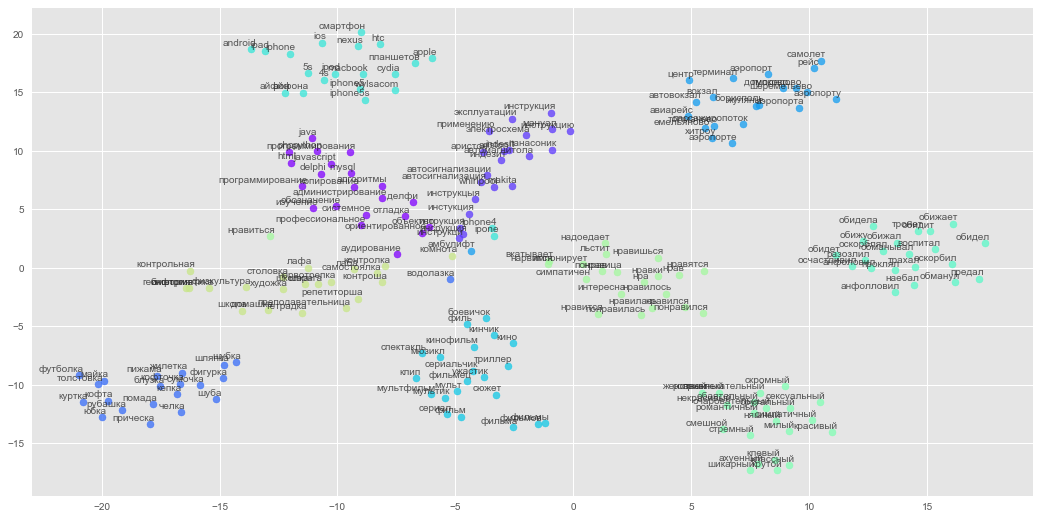

In [570]:
tsne_plot(labels, tokens, classes, samples)

## References
1. Mikolov T. et al. Distributed representations of words and phrases and their compositionality //Advances in neural information processing systems. – 2013. – С. 3111-3119.
2. Rubtsova U. Constructing a corpus for sentiment classification training //Software and Systems. – 2015. – №. 109. – С. 72-78.
3. Rehurek R., Sojka P. “Software framework for topic modelling with large corpora”, Proceedings of the LREC 2010 Workshop on New Challenges for NLP Frameworks, pp. 46-50, 2010.

<!--bibtex

@Article{PER-GRA:2007,
  Author    = {P\'erez, Fernando and Granger, Brian E.},
  Title     = {{IP}ython: a System for Interactive Scientific Computing},
  Journal   = {Computing in Science and Engineering},
  Volume    = {9},
  Number    = {3},
  Pages     = {21--29},
  month     = may,
  year      = 2007,
  url       = "http://ipython.org",
  ISSN      = "1521-9615",
  doi       = {10.1109/MCSE.2007.53},
  publisher = {IEEE Computer Society},
}

@article{Papa2007,
  author = {Papa, David A. and Markov, Igor L.},
  journal = {Approximation algorithms and metaheuristics},
  pages = {1--38},
  title = {{Hypergraph partitioning and clustering}},
  url = {http://www.podload.org/pubs/book/part\_survey.pdf},
  year = {2007}
}

-->